# Report on Starbucks Corp. Stock Performance (2022-2024)

**Introduction:**
This report provides an analysis of Starbucks Corporation's stock performance from January 1, 2022, to the present date. By examining historical stock data, we aim to offer insights into financial trends, market volatility, and factors influencing the company's stock price over this period.

**Data Overview:**
The dataset consists of seven columns:
1. Date: The date of the stock data.
2. Open: The opening price of the stock on the given date.
3. High: The highest price of the stock during the trading day.
4. Low: The lowest price of the stock during the trading day.
5. Close: The closing price of the stock on the given date.
6. Adj Close: The adjusted closing price of the stock, accounting for any corporate actions such as dividends or stock splits.
7. Volume: The trading volume of the stock on the given date.

**Key Findings:**
1. **Overall Trend:** A line plot of closing prices over time reveals the overall trend in Starbucks stock performance. Despite fluctuations, there seems to be a general upward trajectory in the stock price over the analyzed period.

2. **Volatility Analysis:** A candlestick chart provides a detailed view of daily price movements, showing the opening, closing, high, and low prices. This visualization helps in understanding the volatility and price ranges within each trading day.

3. **Trading Volume:** The volume traded over time indicates the level of investor interest and participation in Starbucks stock. High trading volumes may coincide with significant price movements or news events.

4. **Moving Average:** Calculating and plotting the 30-day moving average alongside closing prices helps in identifying trends and smoothing out short-term fluctuations, providing a clearer picture of the stock's overall direction.

5. **Price Range:** Analyzing the daily price range (the difference between the high and low prices) provides insights into intraday price volatility and trading behavior.

6. **Daily Price Change Percentage:** Tracking the percentage change between the opening and closing prices on a daily basis helps in understanding investor sentiment and market reactions to news and events impacting Starbucks.

7. **Rolling Statistics:** Examining rolling mean and standard deviation of closing prices offers insights into the stock's volatility and potential trend reversals. This can assist traders and investors in making informed decisions.

8. **Daily Returns Histogram:** Plotting the distribution of daily returns provides an overview of the stock's volatility and potential risk levels. Understanding the distribution of returns can aid in risk management and portfolio optimization.

9. **Monthly Average Closing Prices:** Analyzing the monthly average closing prices helps in identifying longer-term trends and seasonal patterns in Starbucks stock performance.

**Conclusion:**
In conclusion, the analysis of Starbucks Corporation's stock performance from 2022 to 2024 provides valuable insights for investors, traders, and stakeholders. Despite short-term fluctuations and market volatility, the stock has demonstrated a generally upward trend, reflecting positive investor sentiment and confidence in the company's prospects. Understanding the factors driving stock price movements, volatility patterns, and long-term trends is essential for making informed investment decisions and managing risk effectively. Further research and analysis may be warranted to gain deeper insights into the underlying drivers of Starbucks' stock performance and its implications for investors.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
starbucks_data = pd.read_csv("/kaggle/input/starbucks-corp-stock-2022-present/sbux_stock_data.csv")

In [7]:
starbucks_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,116.470001,117.800003,114.779999,116.680000,110.961662,5475700
1,2022-01-04,116.900002,117.050003,114.169998,114.239998,108.641243,8367600
2,2022-01-05,114.400002,114.959999,110.400002,110.440002,105.027473,8662300
3,2022-01-06,110.000000,111.879997,109.989998,111.139999,105.693169,6099900
4,2022-01-07,108.220001,109.709999,107.480003,107.570000,102.298134,11266400


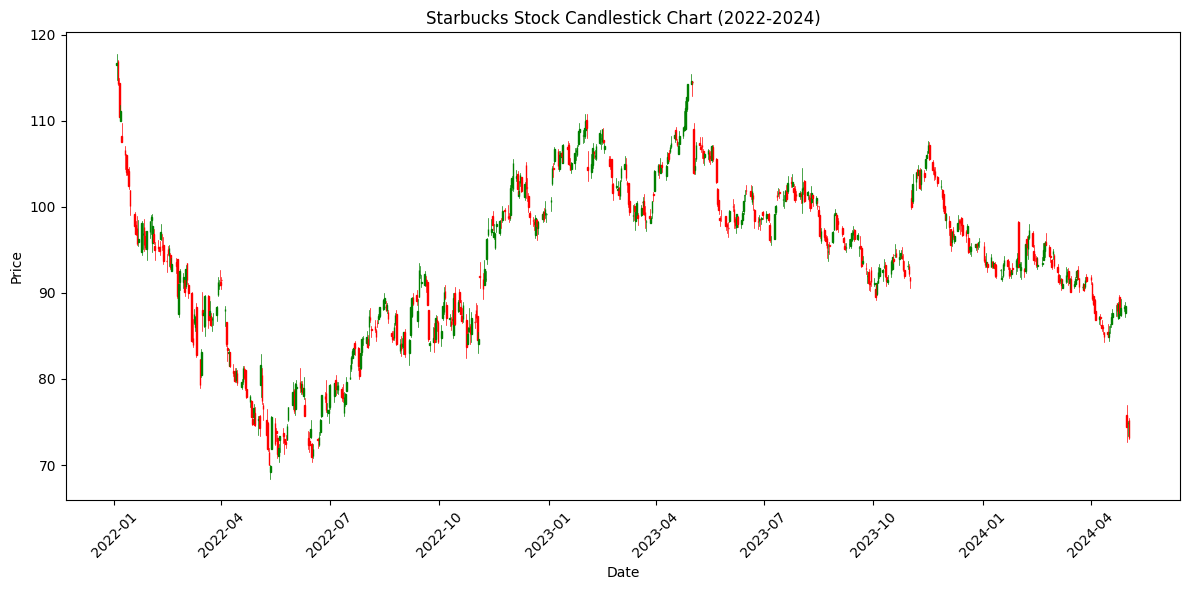

In [11]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Convert Date column to datetime
starbucks_data['Date'] = pd.to_datetime(starbucks_data['Date'])
# Set Date column as index
starbucks_data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, zip(mdates.date2num(starbucks_data.index.to_pydatetime()), starbucks_data['Open'], starbucks_data['High'], starbucks_data['Low'], starbucks_data['Close']), width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Starbucks Stock Candlestick Chart (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

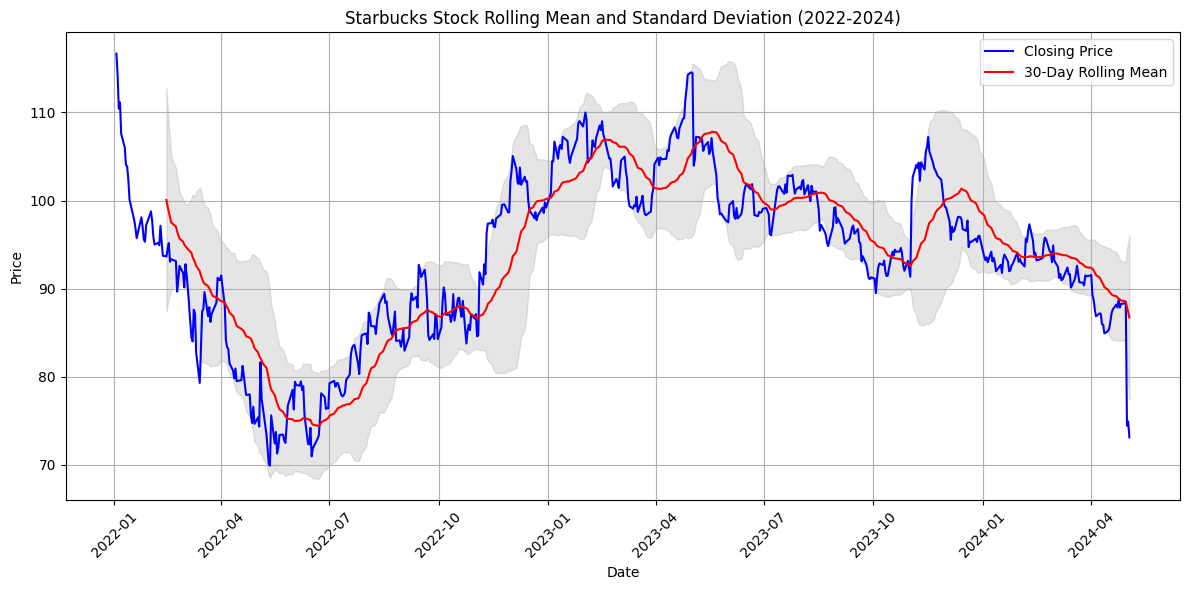

In [19]:
# Calculate rolling mean and standard deviation
rolling_mean = starbucks_data['Close'].rolling(window=30).mean()
rolling_std = starbucks_data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(starbucks_data.index, starbucks_data['Close'], label='Closing Price', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='30-Day Rolling Mean', color='red')
plt.fill_between(rolling_std.index, rolling_mean - 2 * rolling_std, rolling_mean + 2 * rolling_std, color='gray', alpha=0.2)
plt.title('Starbucks Stock Rolling Mean and Standard Deviation (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

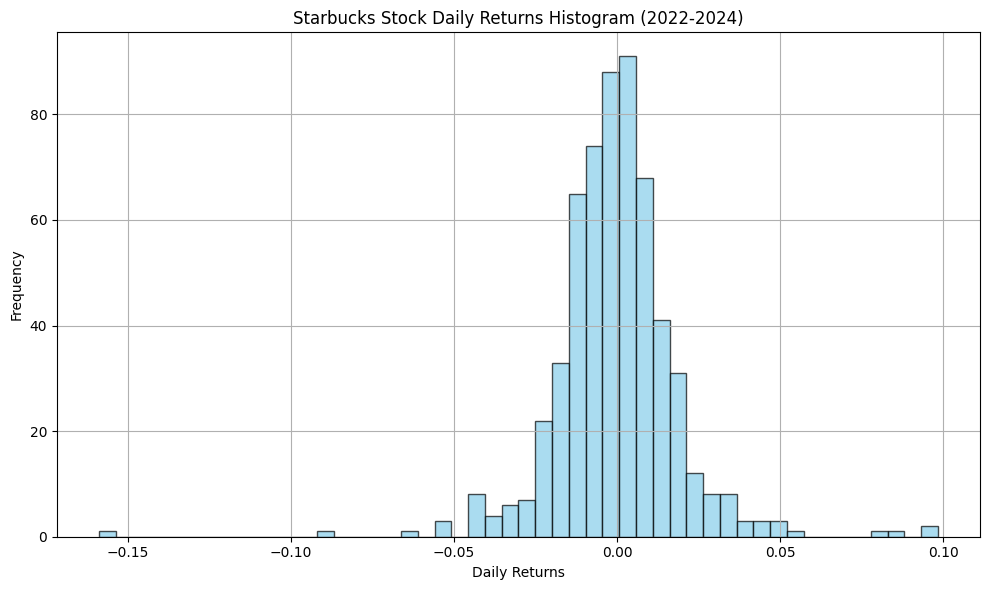

In [20]:
# Calculate daily returns
starbucks_data['Daily Returns'] = starbucks_data['Close'].pct_change()

plt.figure(figsize=(10, 6))
starbucks_data['Daily Returns'].hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Starbucks Stock Daily Returns Histogram (2022-2024)')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

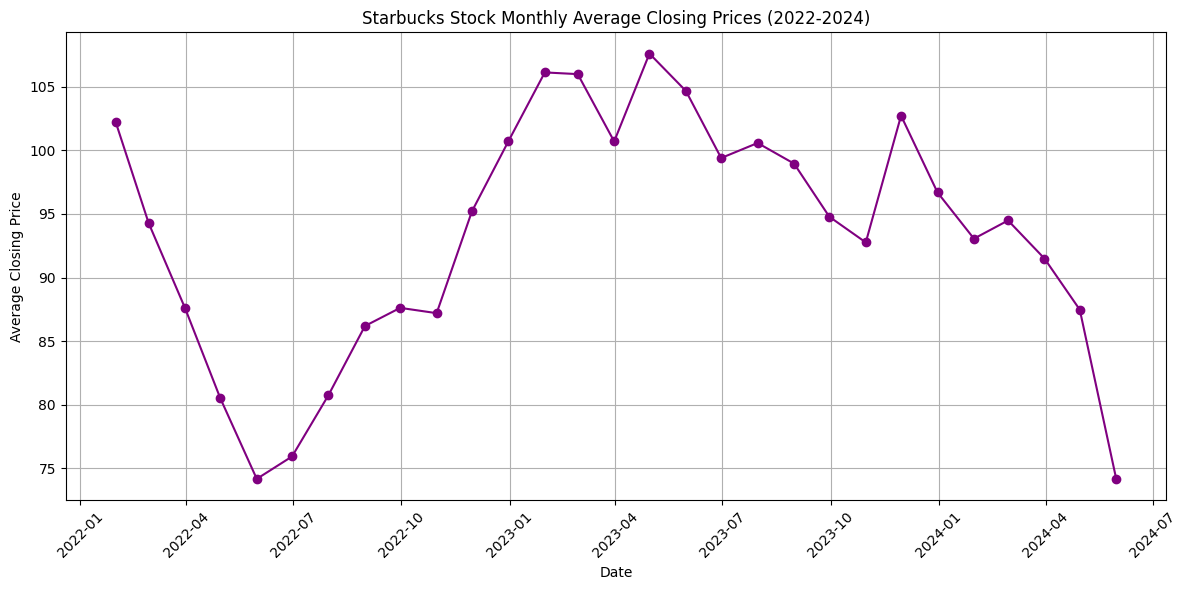

In [21]:
# Resample data to monthly frequency and calculate average closing prices
monthly_avg = starbucks_data['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color='purple')
plt.title('Starbucks Stock Monthly Average Closing Prices (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()